<img src="https://www.mines.edu/webcentral/wp-content/uploads/sites/267/2019/02/horizontallightbackground.jpg" width="100%"> 
### CSCI250 Python Computing: Building a Sensor System
<hr style="height:5px" width="100%" align="left">

# `numpy`: random numbers

# Objectives
* introduce random number operations in `numpy`
* build and plot 1D and 2D distributions
* find central and dispersion distribution attributes

# Resources
* [numpy.org](http://www.numpy.org)
* [`numpy` user guide](https://docs.scipy.org/doc/numpy/user)
* [`numpy` reference](https://docs.scipy.org/doc/numpy/reference)

Import the `random` module from `numpy` with alias `rng`.

In [1]:
import numpy.random as rng

In [4]:
rng.beta

<function RandomState.beta>

In [6]:
import numpy as np
import matplotlib.pyplot as plt

n = 10000  # random numbers count

# `rng.random()`
Return random floats in the half-open interval [0.0, 1.0).

In [7]:
a = rng.random(n)

print(a)

[0.48538113 0.86791022 0.12496288 ... 0.99420749 0.57056898 0.32582015]


In [8]:
rng.random?

# `rng.uniform()`
Returns samples from a [uniform distribution](https://en.wikipedia.org/wiki/Uniform_distribution_(continuous)).

In [9]:
vMIN = 1.0
vMAX = 3.0
a = rng.uniform( vMIN, vMAX, n)

print(a)

[2.90453605 2.61287228 2.39799062 ... 2.34297534 1.29322877 2.35214378]


# `plt.hist()`
Plot a histogram, i.e. a distribution of samples in equal bins.

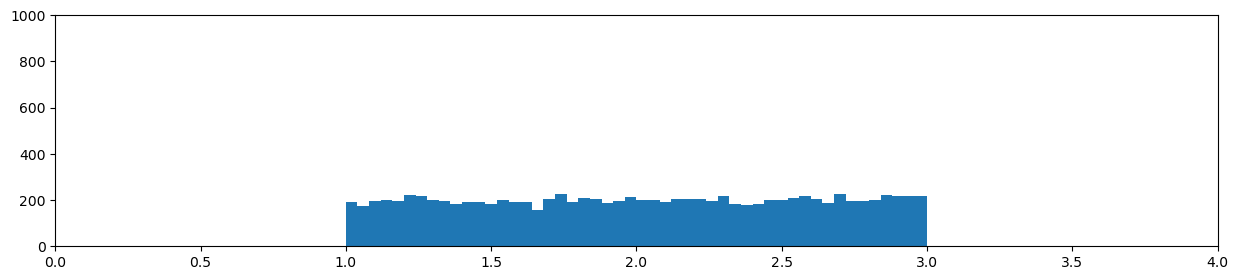

In [13]:
vMIN = 1.0
vMAX = 3.0
a = rng.uniform( vMIN, vMAX, n)

plt.figure(figsize=(15,3) )
plt.hist(a, bins=50)             # histogram, not PDF
plt.axis([0,4,0,1000]);

# `rng.normal()`
Returns samples from a [normal (Gaussian) distribution](https://en.wikipedia.org/wiki/Normal_distribution).

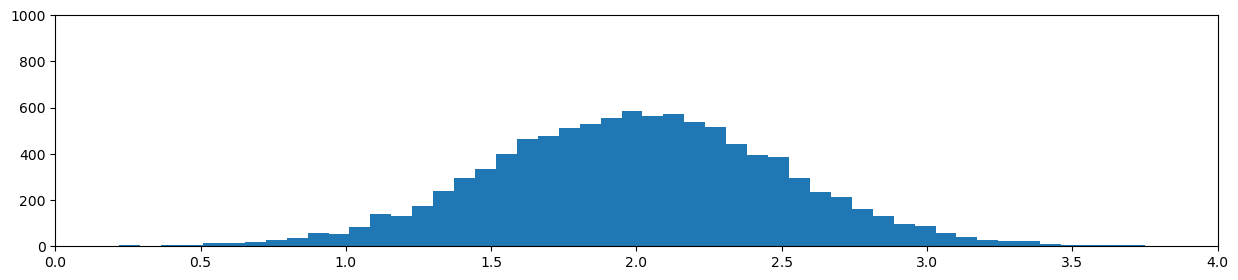

In [14]:
vCNT = 2.00
vSTD = 0.50
b = rng.normal( vCNT, vSTD, n)

plt.figure(figsize=(15,3) )
plt.hist(b, bins=50)             # histogram, not PDF
plt.axis([0,4,0,1000]);

# `np.mean()`

Calculates the mean of a distribution, a measure of its **center**.

In [15]:
print( format(np.mean(a),'.3f') )
print( format(np.mean(b),'.3f') )

2.013
2.001


# `np.std()`

Calculates the standard deviation of an array, a measure of its **spread**.

In [16]:
print( format(np.std(a),'.3f') )
print( format(np.std(b),'.3f') )

0.580
0.499


# `rng.seed()`
Seed the random number generator - ensures identical repeat samples.

In [22]:
rng.seed(2022)

b1 = rng.normal(1.0,0.25,n)
print(b1)

b2 = rng.normal(1.0,0.25,n)
print(b2)

[0.99986803 0.93127464 0.96517861 ... 1.0777735  1.01747761 0.93873623]
[1.01609786 1.18285266 1.29887001 ... 0.8919038  0.67451338 1.18051537]


Overlay distributions with different plotting attributes.

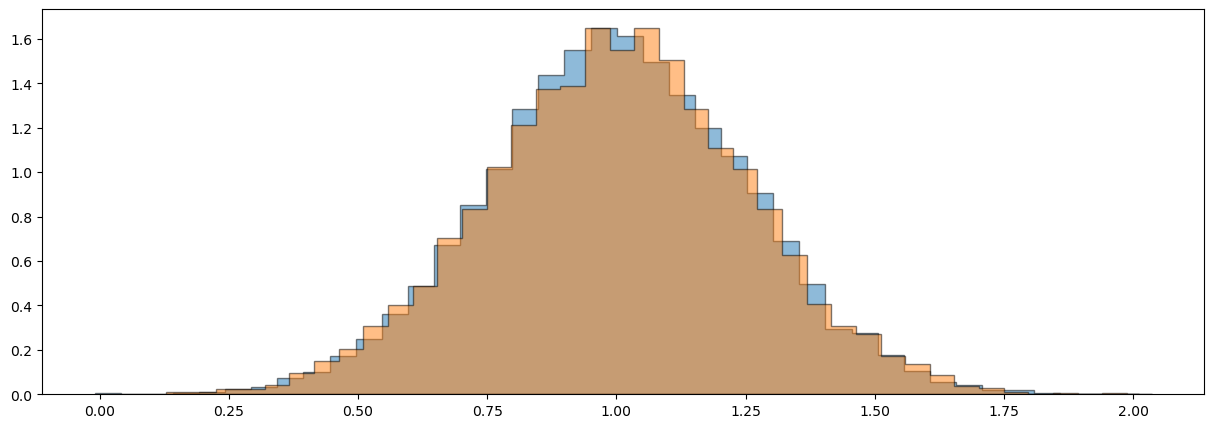

In [25]:
kwargs = dict(histtype = 'stepfilled', 
              alpha = 0.5,              # transparency
              density = True,           # plot PDF, not histogram
              bins = 40,
              edgecolor = 'k')

plt.figure(figsize=(15,5) )
plt.hist(b1, **kwargs);                 # dictionary unpacking
plt.hist(b2, **kwargs); 

# `rnd.choice()`

Generates a specified number of random samples from a 1D array.

In [26]:
nSamp = 3

rng.choice(b, nSamp)

array([2.21228258, 1.89678131, 1.37182799])

<img src="http://www.dropbox.com/s/fcucolyuzdjl80k/todo.jpg?raw=1" width="10%" align="right">

Explore additional functions from the `random` module.
* Add comments explaining their purpose. 
* Include examples demonstrating their usage.

<img src="https://www.dropbox.com/s/7vd3ezqkyhdxmap/demo.png?raw=1" width="10%" align="left">

# Demo

Plot the trajectories of two particles executing **random walk** steps.

* Use uniform and normal distributions, respectively.
* Use identical standard deviations for both distributions.

In [27]:
import time
rng.seed( 2020 )

# number of random walk steps
n = 10000

# stadard deviation
sig = 0.5
cen = 0.0

Generate random steps from a **uniform distribution**.

$$f(x) = \dfrac{1}{2\sqrt{3}\sigma} \sqcap\left( \dfrac{x-\bar{x}}{2\sqrt{3}\sigma} \right)$$

In [28]:
a = 2*np.sqrt(3)*sig

xu = cen + rng.uniform(-a/2,+a/2,n)
yu = cen + rng.uniform(-a/2,+a/2,n)

print( format(xu.std(),'.3f') )
print( format(yu.std(),'.3f') )

0.500
0.499


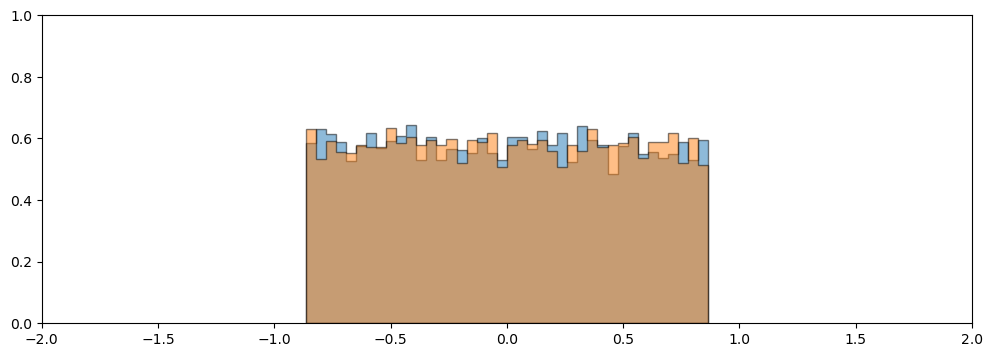

In [29]:
plt.figure(figsize=(12,4) )
plt.hist(xu, **kwargs);
plt.hist(yu, **kwargs);
plt.axis([-2, +2, 0, 1]);

Generate random steps from a **normal distribution**.

$$g(x) = \dfrac{1}{\sqrt{2\pi}\sigma} e^{-\dfrac{1}{2} \left( \dfrac{x-\bar{x}}{\sigma} \right)^2} $$

In [30]:
xn = rng.normal(cen,sig,n)
yn = rng.normal(cen,sig,n)

print( format(xu.std(),'.3f') )
print( format(yu.std(),'.3f') )

0.500
0.499


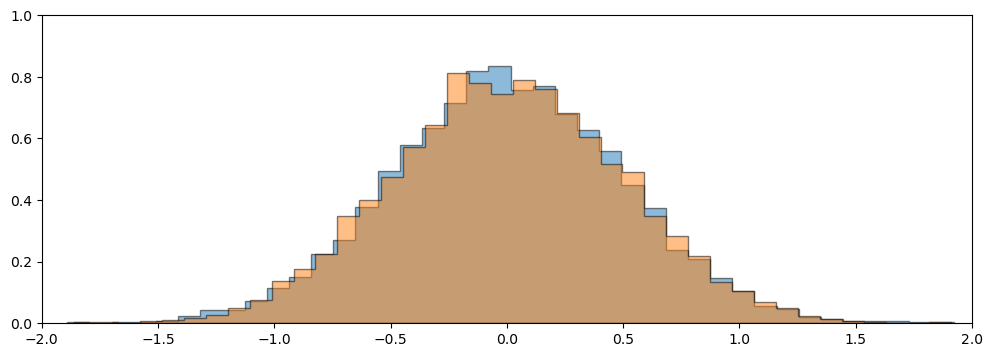

In [31]:
plt.figure(figsize=(12,4) )
plt.hist(xn, **kwargs);
plt.hist(yn, **kwargs);
plt.axis([-2, +2, 0, 1]);

Define random walk **position** by accumulating the individual **steps**.

In [34]:
# uniform distribution
xuc = xu.cumsum()
yuc = yu.cumsum()

# normal distribution
xnc = xn.cumsum()
ync = yn.cumsum()

Define **random walk** plot space (min and max in $x$ and $y$).

In [35]:
Dmin = np.min( [xuc.min(), yuc.min(), xnc.min(), ync.min()] )
Dmax = np.max( [xuc.max(), yuc.max(), xnc.max(), ync.max()] )

D = 1.1 * np.max([Dmax,np.abs(Dmin)])

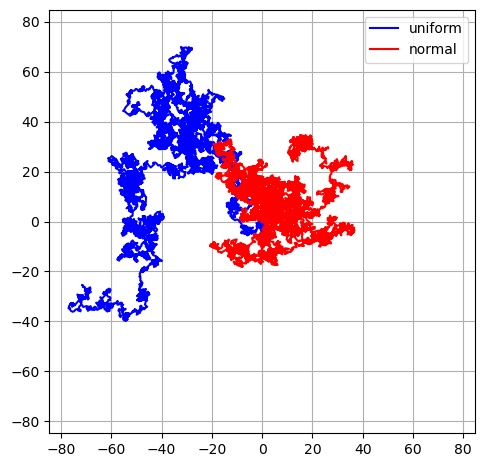

In [36]:
plt.figure(figsize=(5.5,5.5))
plt.axis([-D, +D, -D, +D]);
plt.grid(True)

# plot random walk - use vectorized calculations
plt.plot( xuc, yuc, 'b');
plt.plot( xnc, ync, 'r');
plt.legend(['uniform','normal']);

# `plt.hist2d()`
Make a 2D histogram plot.

Generate histogram of uniform distribution random walk:

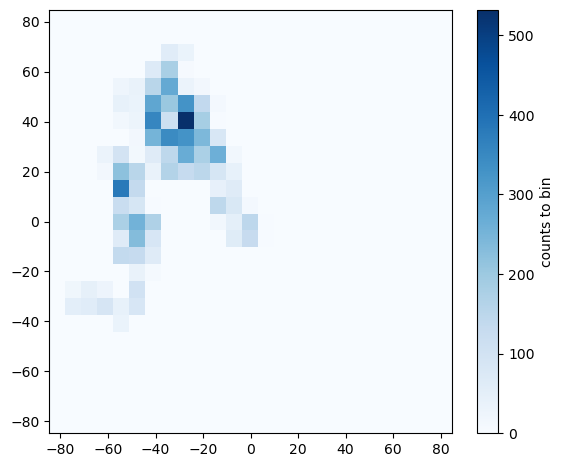

In [41]:
plt.figure(figsize=(6.5,5.5));

plt.hist2d(xuc,yuc, bins=25, range=[ [-D,+D], [-D,+D] ], cmap='Blues');

cb = plt.colorbar(label="counts to bin")

Generate histogram of normal distribution random walk:

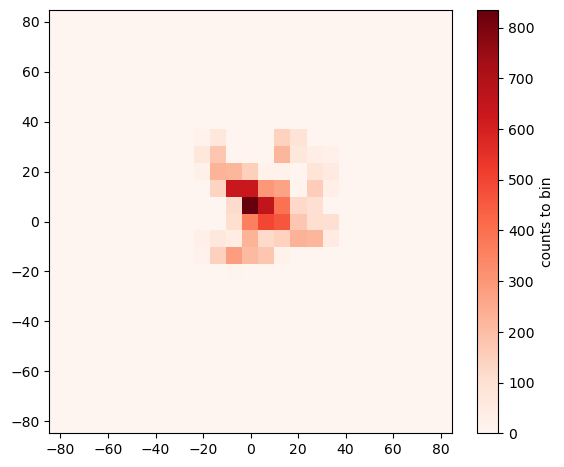

In [42]:
plt.figure(figsize=(6.5,5.5));

plt.hist2d(xnc,ync, bins=25, range=[ [-D,+D], [-D,+D] ], cmap='Reds')

cb = plt.colorbar(label="counts to bin")

# `plt.hexbin()`
Make a hexagonal binning plot.

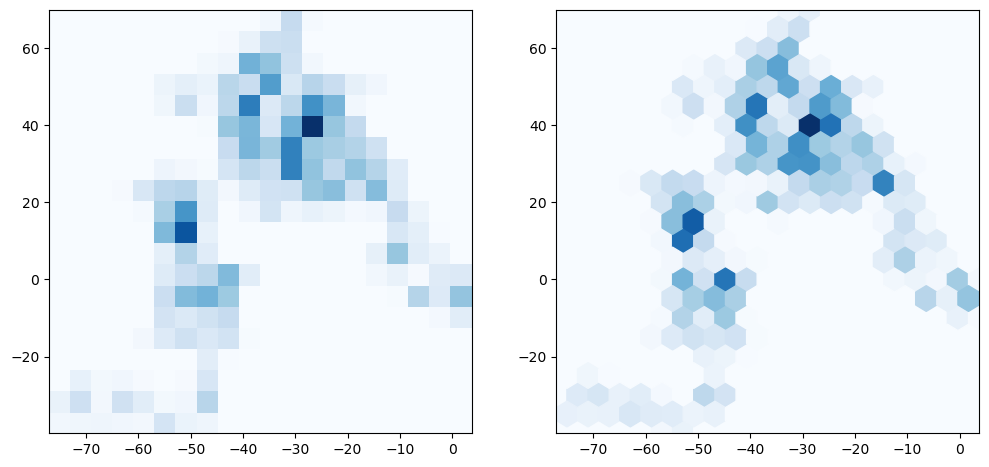

In [49]:
plt.figure(figsize=(12,5.5))

plt.subplot(1,2,1)
plt.hist2d(xuc, yuc,     bins=20, cmap='Blues')
plt.axis([np.min(xuc),np.max(xuc),np.min(yuc),np.max(yuc)])

plt.subplot(1,2,2)
plt.hexbin(xuc, yuc, gridsize=20, cmap='Blues')
plt.axis([np.min(xuc),np.max(xuc),np.min(yuc),np.max(yuc)]);

<img src="https://www.dropbox.com/s/7vd3ezqkyhdxmap/demo.png?raw=1" width="10%" align="left">

# Demo

Use random numbers to estimate the value of the number $\pi$. 

Use vectorized operations whenever possible.

## Algorithm

Imagine that you throw darts at a square board.

You estimate how many darts land
* inside a circle of radius $r$
* inside a square of side 2$r$.

Assume that we are using a uniform distribution.

For a large number of darts, the numbers that fall in different regions of the board are proportional with their respective areas. 
* The number of darts in the circle is proportional with its area
$$A_c = \pi R^2.$$
* The number of darts in the square is proportional with its area
$$A_b = 4 R^2.$$

Thus, we can compute the number $\pi$ as
$$\pi = 4\dfrac{A_c}{A_b}.$$

How many darts do you need to use to get a reasonable estimate of $\pi$? 

Begin by choosing the number of darts and the radius:

In [78]:
nDARTS = 10000

R = 1.0

Define the dart coordinates in a rectangular space between [-1,+1]:

In [79]:
# generate random coordinates (random darts)
xDART = rng.uniform( -R,+R, nDARTS)
yDART = rng.uniform( -R,+R, nDARTS)

For every dart, compute the distance from the center of the box:

In [80]:
# NB: use numpy trig ufuncs
rDART = np.sqrt( xDART**2 + yDART**2 )

Select the darts that fall inside the circle of radius $R$:

In [81]:
# NB: use array masking
xCIRC = xDART[ rDART <= R ]
yCIRC = yDART[ rDART <= R ]

Plot dots inside (red) and outside (black) the circle:

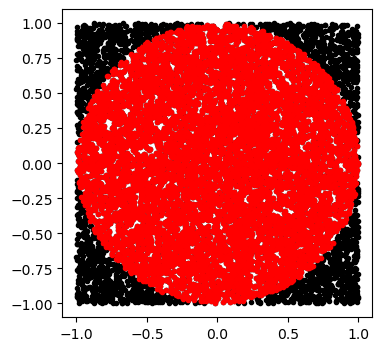

In [82]:
plt.figure(figsize=(4,4))
plt.plot(xDART, yDART, 'k.');
plt.plot(xCIRC, yCIRC, 'r.');

Compute the number $\pi$ as the ratio of 
* darts in the circle to 
* darts in the square

In [83]:
myPi = 4.0 * len(xCIRC) / len(xDART)

In [84]:
import math

print('     my pi:',myPi)
print('   math pi:',np.pi)
print('difference:',myPi-math.pi)

     my pi: 3.1564
   math pi: 3.141592653589793
difference: 0.014807346410206979


What happens if you use a **normal distribution**?

<img src="https://www.dropbox.com/s/wj23ce93pa9j8pe/demo.png?raw=1" width="10%" align="left">

# Exercise

Compute the mean, variance and covariance of 2D uniform and normal *random walk* distributions. The distributions must be normalized such that their integrals over the entire domain of definition is equal to 1. 

Use vectorized calculations whenever possible. Plot the mean on top of the distribution. Ensure that the plots overlay correctly.

By definition, the mean of a 2D distribution $f(x,y)$ is given by:

$\begin{eqnarray}
\overline{x} = \iint x f(x,y) dxdy \\
\overline{y} = \iint y f(x,y) dxdy
\end{eqnarray}$

Similarly, the variances of the 2D distribution are:

$\begin{eqnarray}
\sigma_x^2&=& \iint ( x-\overline{x} )^2 f(x,y) dx dy \\
\sigma_y^2&=& \iint ( y-\overline{y} )^2 f(x,y) dx dy
\end{eqnarray}$

and the covariance is:

$\begin{eqnarray}
c_{xy}=\iint (x-\overline{x}) (y-\overline{y}) f(x,y) dx dy 
\end{eqnarray}$